In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-data/housing.csv


## Packages Loading

In [2]:
# laod require packages
import pandas as ps
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import urllib.request

#Prepration packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

#Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# tools
from joblib import dump, load

## **Utility Fucntions**

In [3]:
# configure matplotlip
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# function to save fig
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
def display_scores(scores):
    '''
        Display score from Cross validation
    '''
    
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

# # **Load and quick look**

In [6]:
df_path = '/kaggle/input/california-housing-data/housing.csv'
housing = pd.read_csv(df_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


the data set contain 8 feature (7 float64 1 object), the target att is 'median_house_value'


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plot


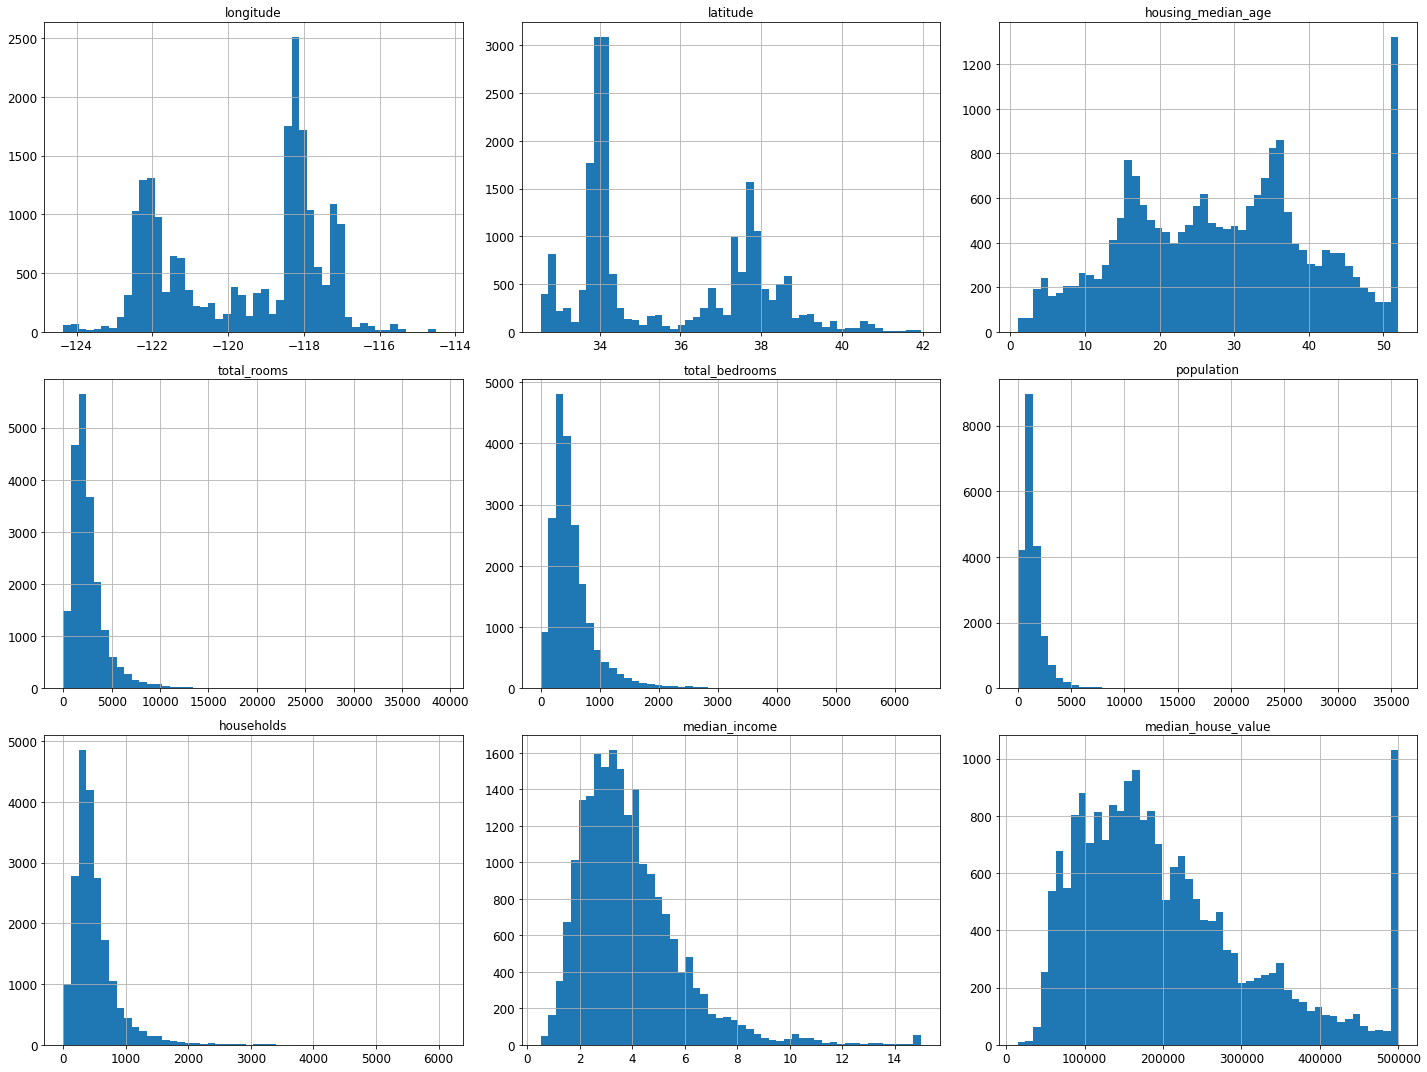

In [10]:
housing.hist(bins=50, figsize=(20,15));
save_fig('attribute_histogram_plot')


### **Create a Test Set**

**Method 1**: using train_test_split

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state= 42)

In [12]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

**method 2** stratified shuffle split, by using median_income as strata

In [13]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

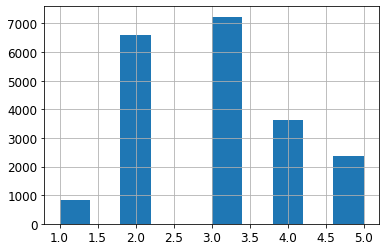

In [14]:
housing['income_cat'].hist();

In [15]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5


In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index , test_index in split.split(housing, housing['income_cat']):
    strat_trian_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_trian_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [18]:
#drop income cat column after split the dataset
for set_ in (strat_trian_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# **Discover and Visualize the Data to Gain Insights**

In [19]:
housing = strat_trian_set.copy()

In [20]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Visualizing Geographical Data

Saving figure housing_price_scatterplot


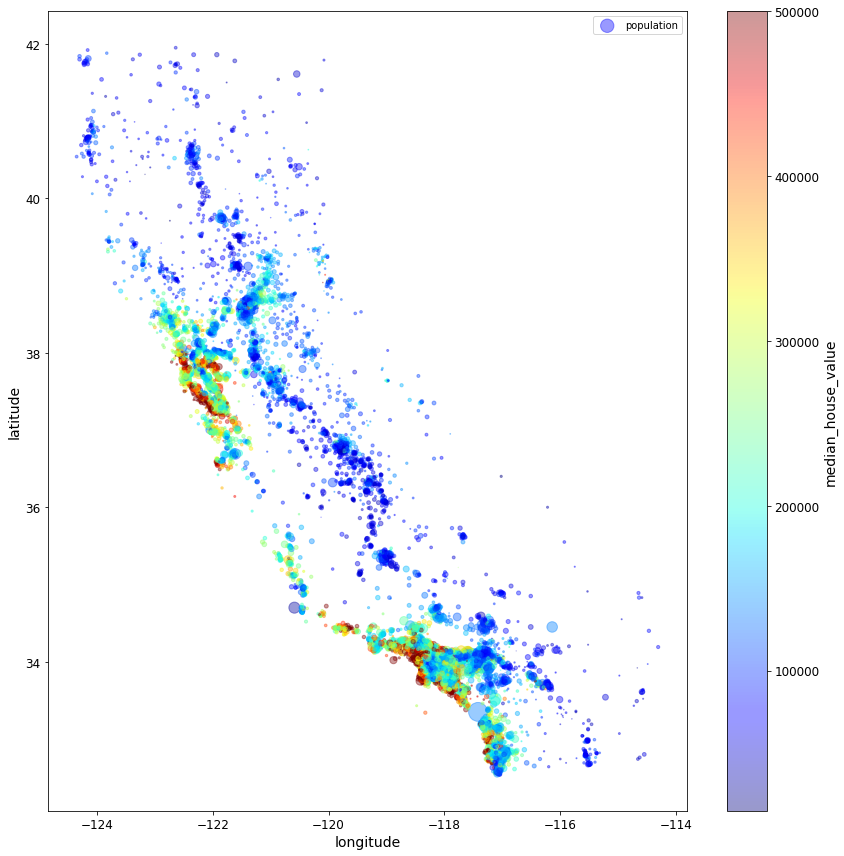

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(12,12),
            s=housing['population']/100, label='population', c='median_house_value',
            cmap=plt.get_cmap('jet'), colorbar=True, sharex=False);
plt.legend()
save_fig('housing_price_scatterplot')

In [22]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f459b2d9790>)

Saving figure california_housing_prices_plot


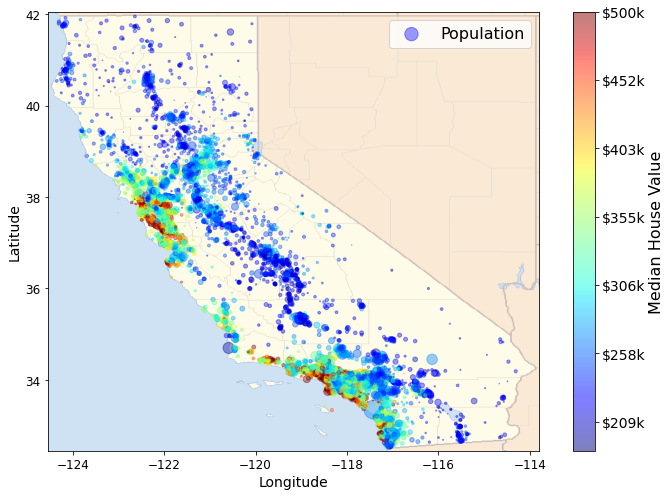

In [23]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## **Looking for Correlations**

In [24]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Saving figure sctter_matrix_plot


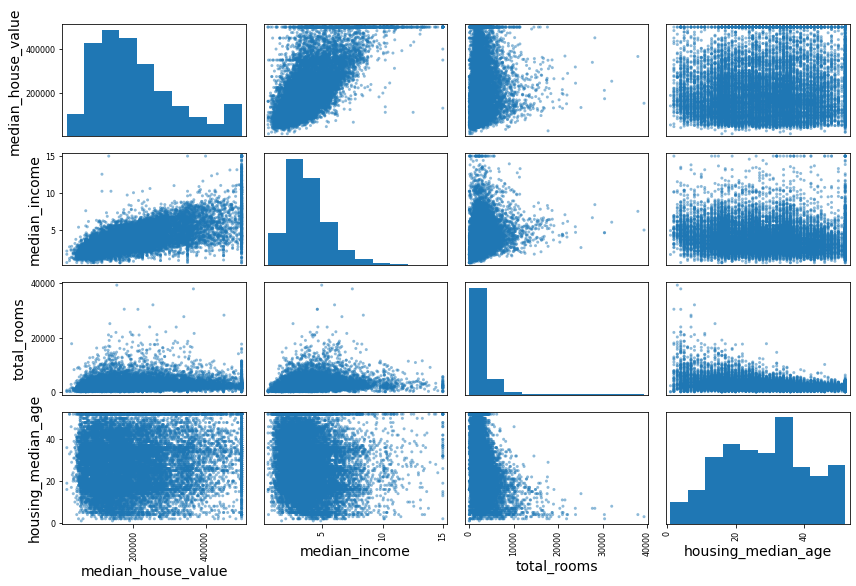

In [25]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
pd.plotting.scatter_matrix(housing[attributes], figsize=(12,8));
save_fig('sctter_matrix_plot')

## Experimenting with Attribute Combinations

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare data for machine learning

In [28]:
# drop label for traingin set
housing = strat_trian_set.drop('median_house_value', axis=1)
housing_label = strat_trian_set['median_house_value'].copy()

## Data Cleaning:<br>
the total_bedrooms contain null value, we will use Imputer transforme, and will use OnehotEncoder to encode categorical columns, by using pipeline and column Transformer

In [29]:
imputer = SimpleImputer(strategy='median')

Remove text Attr becouse median work with numerical att:

In [30]:
housing_num = housing.drop('ocean_proximity', axis=1)
# housing_num = housing.select_dtypes(include=[np.number])

In [31]:
housing_cat = housing[["ocean_proximity"]]

In [32]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [33]:
housing[num_attribs]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [34]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [35]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [36]:
housing_prepared = full_pipeline.fit_transform(housing)

In [37]:
housing_prepared.shape

(16512, 13)

In [38]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
dump(housing_prepared, 'housing_prepared.pkl')

['housing_prepared.pkl']

# Select and Train a Model

## Training and Evaluating on the Training Set

### Models

In [40]:
line_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svm_reg = SVR(kernel='linear')

### Evalustion without cross_validation

In [41]:
#linear Regression 
line_reg.fit(housing_prepared, housing_label)
housing_prediction = line_reg.predict(housing_prepared)
line_rmse = mean_squared_error(housing_label, housing_prediction, squared=False)
line_mae = mean_absolute_error(housing_label,housing_prediction)
print(line_rmse, line_mae)

69050.56219504567 49905.329442715316


In [42]:
# Decision tree
tree_reg.fit(housing_prepared, housing_label)
housing_prediction_tree= tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_label,housing_prediction_tree)
tree_rmse

0.0

In [43]:
#Random forest 
forest_reg.fit(housing_prepared,housing_label)
housing_pred_forest = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_label, housing_pred_forest)
forest_rmse

336442403.7696726

### Evaluation with Cross Validation

In [44]:
#liner model
line_scores = cross_val_score(line_reg, housing_prepared,housing_label,
                             scoring='neg_mean_squared_error', cv=10)
line_rmse_scores = np.sqrt(-line_scores)
display_scores(line_rmse_scores)

Scores:  [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean:  69204.32275494763
Standard Deviation:  2372.070791055922


In [45]:
dump(line_scores, 'line_scores.pkl')

['line_scores.pkl']

In [46]:
#Tree Model
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_label,
                             scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores:  [71177.6601991  69770.07865373 64770.5639395  68536.60203993
 67057.08155801 68847.12456973 70977.38255647 69208.86346929
 67187.87131535 73280.38732407]
Mean:  69081.361562518
Standard Deviation:  2296.288087393378


In [47]:
dump(tree_scores,'tree_scores.pkl')

['tree_scores.pkl']

In [48]:
# Forest
forest_scores = cross_val_score(forest_reg, housing_prepared,housing_label, 
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51039.08053738 48741.94041426 45940.42771745 50501.41453432
 47387.7896427  49595.25845731 51625.68567717 48865.70709952
 47322.87631489 53301.08748462]
Mean:  49432.12678796127
Standard Deviation:  2124.8587921578355


In [49]:
dump(forest_scores, 'forest_scores.pkl')

['forest_scores.pkl']

In [50]:
# SVM model
svm_scores = cross_val_score(svm_reg, housing_prepared,housing_label, 
                               scoring='neg_mean_squared_error', cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores:  [111059.94607445 113687.87132915 107597.3277054  114213.41574463
 108461.30158859 116616.25904798 113850.21483718 112395.74942581
 113807.23691329 112686.31474177]
Mean:  112437.56374082548
Standard Deviation:  2593.2605559090666


In [51]:
dump(svm_scores,'svm_scores.pkl')

['svm_scores.pkl']

#### from above the best model is RandomForestRegressor, so we will do hyperparamter fine tuning

# Fine-Tune Model:

##### we will use GirdSearchCV

In [52]:
param_grid = [
    #try 12 compination of hyperparameters 3 x 4
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,7]},
    #then try 6 with bootstraps set as false
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 7],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
dump(grid_search, 'grid_search.pkl')

['grid_search.pkl']

In [54]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 30}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=30, random_state=42)

In [56]:
cvres = grid_search.cv_results_
for mean_score, parm in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), parm)

63827.76261554265 {'max_features': 2, 'n_estimators': 3}
55056.82212305312 {'max_features': 2, 'n_estimators': 10}
52673.5498401615 {'max_features': 2, 'n_estimators': 30}
60299.48845134689 {'max_features': 4, 'n_estimators': 3}
53106.41271952157 {'max_features': 4, 'n_estimators': 10}
50370.55528306362 {'max_features': 4, 'n_estimators': 30}
58363.22748437211 {'max_features': 6, 'n_estimators': 3}
52446.057900340325 {'max_features': 6, 'n_estimators': 10}
50177.91173851986 {'max_features': 6, 'n_estimators': 30}
58834.71520115655 {'max_features': 7, 'n_estimators': 3}
51694.356175804285 {'max_features': 7, 'n_estimators': 10}
49615.04772459081 {'max_features': 7, 'n_estimators': 30}
62820.05402812565 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53846.18083156347 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59026.17902108823 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52996.55803561763 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [57]:
pd.DataFrame(grid_search.cv_results_).head(1).T

,0
mean_fit_time,0.061848
std_fit_time,0.000322
mean_score_time,0.005802
std_score_time,0.000096
param_max_features,2
param_n_estimators,3
param_bootstrap,NaN
params,"{'max_features': 2, 'n_estimators': 3}"
split0_test_score,-4115538825.348639
split1_test_score,-4091705165.865711


# Randomized Search

In [58]:
from scipy.stats import randint
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_label)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f459b3abad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f459b4285d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [59]:
dump(rnd_search, 'rnd_search.pkl')

['rnd_search.pkl']